<a href="https://colab.research.google.com/github/rvydobima/Tugas_ImageClassification/blob/main/Canny_Resnet50_SGD_0%2C1_BS32_TS224_EP40_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.applications import ResNet50

In [ ]:
! pip install split-folders
import splitfolders

splitfolders.ratio("/content/drive/MyDrive/DATA IVA test/Canny Edge/Augmented", output="output",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 3425 files [00:44, 77.56 files/s] 


Text(0.5, 1.0, 'IVA (+)')

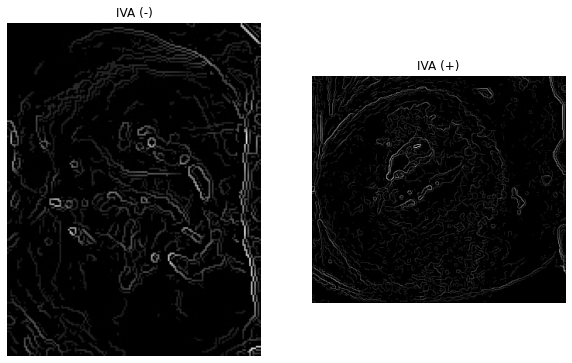

In [ ]:
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# reading images
Image1 = cv2.imread('/content/drive/MyDrive/DATA IVA test/Canny Edge/Augmented/IVA (-)/IVA Negatif 003.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/DATA IVA test/Canny Edge/Augmented/IVA (+)/IVA Positif 001.jpg')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("IVA (-)")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("IVA (+)")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=32
EPOCH=40
CHANNELS=3
TARGET_SIZE=(224,224)

train_dir = '/content/output/train'
val_dir = '/content/output/val'
test_dir = '/content/output/test'

train_datagen = ImageDataGenerator(
                              rescale=1./255,
                              rotation_range=90
                              #zoom_range=0.3
                            )

val_datagen = ImageDataGenerator(
                              rescale=1./255
                              )
test_datagen = ImageDataGenerator(
    rescale=1./255
    )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                            batch_size=BATCH_SIZE,
                                            target_size=TARGET_SIZE,
                                            seed = 1337,
                                            class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                        batch_size=BATCH_SIZE,
                                        target_size=TARGET_SIZE,
                                        seed = 1337,
                                        class_mode='binary',shuffle=False)
                         
test_generator = test_datagen.flow_from_directory(test_dir,
                                          batch_size=BATCH_SIZE,
                                          target_size=TARGET_SIZE,
                                          class_mode='binary') 

Found 2396 images belonging to 2 classes.
Found 684 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


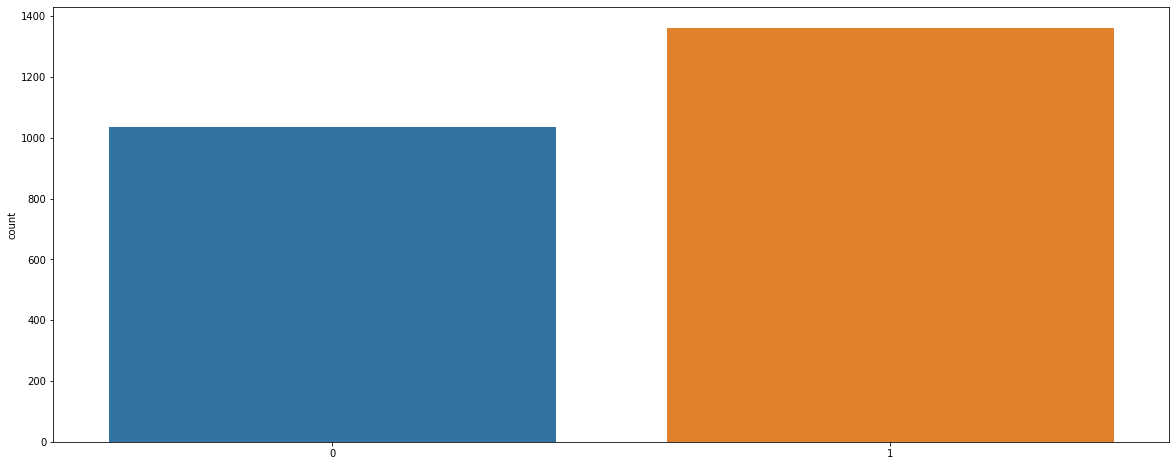

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(x = train_generator.classes)

In [ ]:
class_names = list(train_generator.class_indices)
print(class_names)

['IVA (+)', 'IVA (-)']


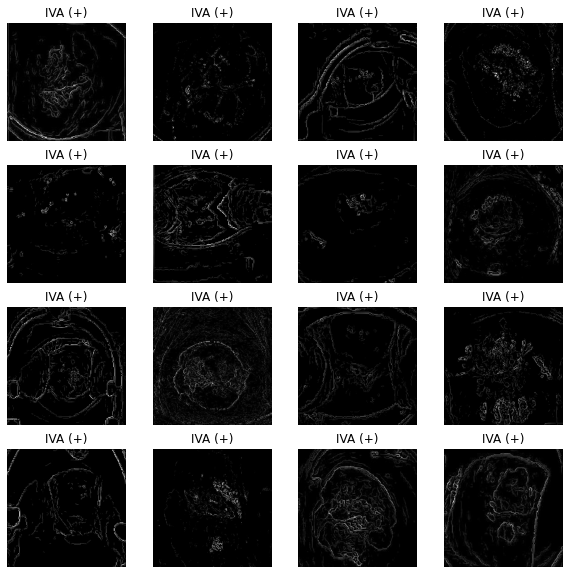

In [ ]:
x,y = next(train_generator)
class_names = list(train_generator.class_indices)
# function to plot images
def plotImages(x,y):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow((x[i] * 255).astype(np.uint8))
        # plt.imshow(x[i])
        plt.title(class_names[np.argmax(y[i])])
        plt.axis("off")
    plt.show()
plotImages(x,y)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

base_model = ResNet50(weights= None, include_top=False, input_shape= (224,224,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)


early_stopping_monitor = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')

predictions = Dense(1 , activation= 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)

model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.1),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_generator, validation_data = val_generator, epochs = EPOCH, callbacks=early_stopping_monitor)

Epoch 1/40
75/75 [==============================] - 36s 226ms/step - loss: 1.3719 - acc: 0.6828 - val_loss: 0.8043 - val_acc: 0.4327
Epoch 2/40
75/75 [==============================] - 15s 202ms/step - loss: 0.2986 - acc: 0.8639 - val_loss: 1.3327 - val_acc: 0.4313
Epoch 3/40
75/75 [==============================] - 15s 200ms/step - loss: 0.2646 - acc: 0.9161 - val_loss: 1.2666 - val_acc: 0.4444
Epoch 4/40
75/75 [==============================] - 15s 199ms/step - loss: 0.1061 - acc: 0.9683 - val_loss: 1.9748 - val_acc: 0.4518
Epoch 5/40
75/75 [==============================] - 15s 200ms/step - loss: 0.0637 - acc: 0.9770 - val_loss: 0.9829 - val_acc: 0.6652
Epoch 6/40
75/75 [==============================] - 15s 199ms/step - loss: 0.0430 - acc: 0.9850 - val_loss: 0.2039 - val_acc: 0.9152
Epoch 7/40
75/75 [==============================] - 15s 200ms/step - loss: 0.0257 - acc: 0.9912 - val_loss: 0.2409 - val_acc: 0.8991
Epoch 8/40
75/75 [==============================] - 15s 199ms/step - 

In [ ]:
early_stopping_monitor.stopped_epoch

25

In [ ]:
score = model.evaluate(test_generator)

11/11 [==============================] - 1s 90ms/step - loss: 0.1020 - acc: 0.9826


Text(0.5, 1.0, 'Training and Validation Loss')

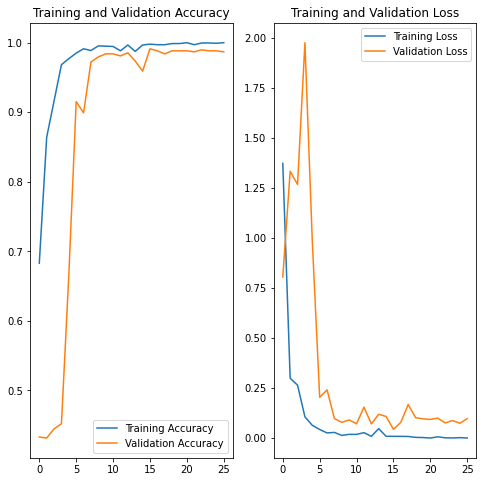

In [ ]:
if early_stopping_monitor.stopped_epoch == 0:
  EPOCH_RANGE = EPOCH
else:
  EPOCH_RANGE = early_stopping_monitor.stopped_epoch+1

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH_RANGE), acc, label = 'Training Accuracy')
plt.plot(range(EPOCH_RANGE), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH_RANGE), loss, label = 'Training Loss')
plt.plot(range(EPOCH_RANGE), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [ ]:
x_test,y_test = test_generator.next()

predictions = model.predict(x_test)

In [ ]:
len(x_test)

32

In [ ]:
len(predictions)

32

In [ ]:
predictions

array([[1.9046416e-07],
       [7.4748334e-07],
       [1.2023136e-05],
       [1.6071979e-09],
       [4.4610781e-05],
       [3.2497710e-06],
       [1.9041481e-05],
       [4.6199497e-07],
       [9.9951553e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.7634539e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.1076285e-05],
       [9.8062461e-05],
       [1.0000000e+00],
       [3.2015496e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [8.8939691e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [ ]:
len(y_test)

32

In [ ]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [ ]:
length = len(y_test)

string_y_test=[]

for i in range(length):
  if y_test[i] > 0.5:
    string_y_test.append("IVA (-)")
  else:
    string_y_test.append("IVA (+)") 

In [ ]:
length = len(predictions)

string_predictions=[]

for i in range(length):
  if predictions[i] > 0.5:
    string_predictions.append("IVA (-)")
  else:
    string_predictions.append("IVA (+)") 

In [ ]:
len(string_predictions)

32

In [ ]:
string_predictions

['IVA (+)',
 'IVA (+)',
 'IVA (+)',
 'IVA (+)',
 'IVA (+)',
 'IVA (+)',
 'IVA (+)',
 'IVA (+)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (+)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (+)',
 'IVA (+)',
 'IVA (-)',
 'IVA (+)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (+)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)',
 'IVA (-)']

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):

     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
     else:
         print('Confusion matrix, without normalization')

     print(cm)

     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('Predicted label')
     plt.xlabel('Actual label')

In [ ]:
print(len(string_y_test))
print(len(string_predictions))

32
32


Confusion matrix, without normalization
[[13  0]
 [ 0 19]]


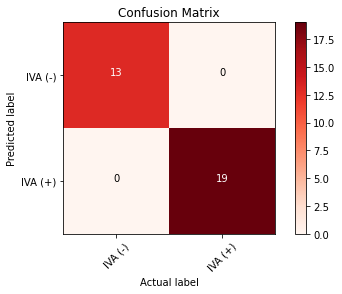

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=string_y_test, y_pred=string_predictions)
conf_mat_plot_labels = ['IVA (-)','IVA (+)']
plot_confusion_matrix(cm=conf_mat, classes=conf_mat_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(string_y_test, string_predictions))

              precision    recall  f1-score   support

     IVA (+)       1.00      1.00      1.00        13
     IVA (-)       1.00      1.00      1.00        19

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
  
# defining the canny detector function
   
# here weak_th and strong_th are thresholds for
# double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):
      
    # conversion of image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)
       
    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
      
    # Conversion of Cartesian coordinates to polar 
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
       
    # setting the minimum and maximum thresholds 
    # for double thresholding
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image  
    height, width = img.shape
       
    # Looping through every pixel of the grayscale 
    # image
    for i_x in range(width):
        for i_y in range(height):
               
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
            # selecting the neighbours of the target pixel
            # according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
              
            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
               
            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)              
    ids = np.zeros_like(img)
       
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
              
            grad_mag = mag[i_y, i_x]
              
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
       
    # finally returning the magnitude of
    # gradients of edges
    return mag

In [ ]:
model.save('result/Canny_Resnet50_SGD_0,1._BS32_TS224_EP40.h5')

Saving images (18).jpg to images (18).jpg
images (18).jpg
[[6.414363e-05]]
IVA (+)


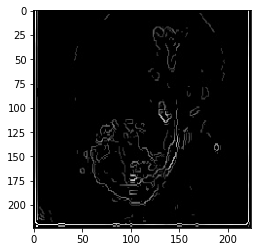

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  # img = image.load_img(path, target_size=(224,224))
  
  frame = cv2.imread(path)
  canny_img = Canny_detector(frame)
    
  # Displaying the input and output image  
  # plt.figure()
  # f, plots = plt.subplots(2, 1) 
  # plots[0].imshow(frame)
  # plots[1].imshow(canny_img)

  cv2.imwrite(path,canny_img)

  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = x/255
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=32)
  
  print(fn)
  print(predictions)
  if predictions[0]>0.5:
       print("IVA (-)")
  else:
       print("IVA (+)")